# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [13]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [19]:
#your code here
import requests
import io
import zipfile

r = requests.get('http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip', stream = True)
z = zipfile.ZipFile(io.BytesIO(r.content))

salaries = pd.read_csv(z.open('Salaries.csv'))
teams = pd.read_csv(z.open('Teams.csv'))






In [29]:
salaries.head()
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [28]:
#your code here

summary = salaries.groupby(['teamID', 'yearID']).sum()

summary



salary
teamID yearID           
ANA    1997     31135472
       1998     41281000
       1999     55388166
       2000     51464167
       2001     47535167
       2002     61721667
       2003     79031667
       2004    100534667
ARI    1998     32347000
       1999     68703999
       2000     81027833
       2001     85082999
       2002    102819999
       2003     80657000
       2004     69780750
       2005     62329166
       2006     59684226
       2007     52067546
       2008     66202712
       2009     73115666
       2010     60718166
       2011     53639833
       2012     73804833
       2013     90132000
ATL    1985     14807000
       1986     17102786
       1987     16544560
       1988     12728174
       1989     11112334
       1990     14555501
...                  ...
TOR    1993     47279166
       1994     43433668
       1995     50590000
       1996     29555083
       1997     47079833
       1998     51376000
       1999     45444333
       2000     44838332
       2001     76895999
       2002     76864333
       2003     51269000
       2004     50017000
       2005     45719500
       2006     71365000
       2007     81942800
       2008     97793900
       2009     80538300
       2010     62234000
       2011     62567800
       2012     75009200
       2013    126288100
WAS    2005     48581500
       2006     63143000
       2007     36947500
       2008     54961000
       2009     59928000
       2010     61400000
       2011     63856928
       2012     80855143
       2013    113703270

[828 rows x 1 columns]

#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [35]:
#your code here

merged = summary.merge(teams, how='inner', left_index=True, right_on=['teamID', 'yearID'])


,salary,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2248,31135472,1997,AL,ANA,ANA,W,2,162,82.0,84,...,140.0,0.98,Anaheim Angels,Edison International Field,1767330.0,102,102,ANA,ANA,ANA
2276,41281000,1998,AL,ANA,ANA,W,2,162,81.0,85,...,146.0,0.98,Anaheim Angels,Edison International Field,2519280.0,102,102,ANA,ANA,ANA
2308,55388166,1999,AL,ANA,ANA,W,4,162,81.0,70,...,156.0,0.98,Anaheim Angels,Edison International Field,2253123.0,99,100,ANA,ANA,ANA
2337,51464167,2000,AL,ANA,ANA,W,3,162,81.0,82,...,184.0,0.97,Anaheim Angels,Edison International Field,2066982.0,102,103,ANA,ANA,ANA
2367,47535167,2001,AL,ANA,ANA,W,3,162,81.0,75,...,142.0,0.98,Anaheim Angels,Edison International Field,2000919.0,101,101,ANA,ANA,ANA
2396,61721667,2002,AL,ANA,ANA,W,2,162,81.0,99,...,151.0,0.98,Anaheim Angels,Edison International Field,2305547.0,100,99,ANA,ANA,ANA
2427,79031667,2003,AL,ANA,ANA,W,3,162,82.0,77,...,138.0,0.98,Anaheim Angels,Edison International Field,3061094.0,98,97,ANA,ANA,ANA
2455,100534667,2004,AL,ANA,ANA,W,1,162,81.0,92,...,126.0,0.98,Anaheim Angels,Angels Stadium of Anaheim,3375677.0,97,97,ANA,ANA,ANA


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

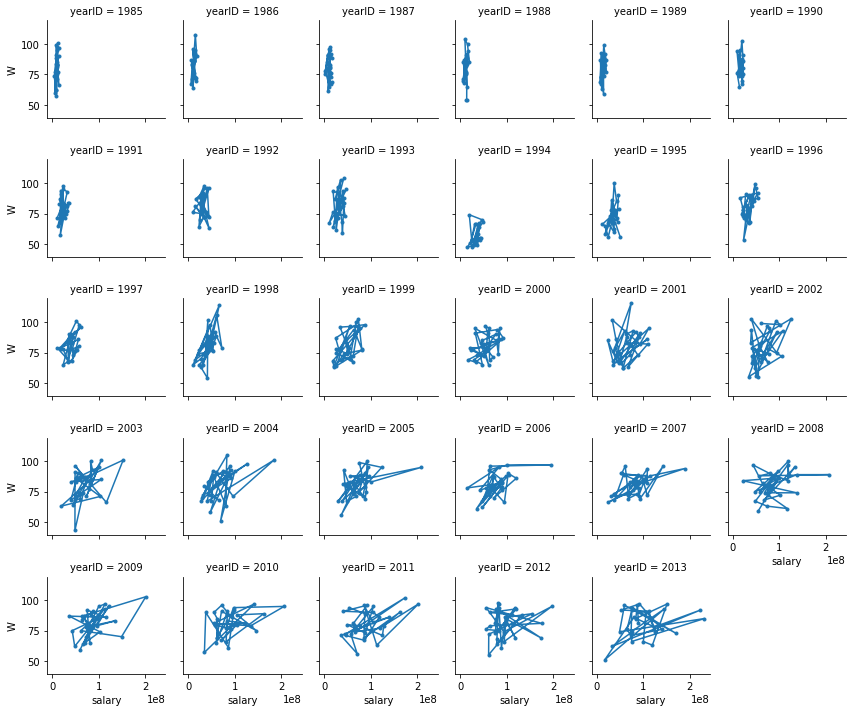

In [42]:
#your code here

import seaborn as sns

g = sns.FacetGrid(merged, col="yearID", col_wrap=6, size= 2)
g = g.map(plt.plot, 'salary', 'W', marker='.')

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [96]:
#your code here

def linear_reg(x_var, y_var):
    b1 = np.cov(x_var, y_var)[0][1] / float(np.var(x_var))
    b0 = np.mean(y_var) - b1 * np.mean(x_var)
    resid = y_var - (b0 + b1 * x_var)
    return pd.Series(list(resid))

resid_by_year = dict()
for year in sorted(merged['yearID'].unique()):
    resid_by_year[year] = linear_reg(merged[merged['yearID']==year]['salary'], merged[merged['yearID']==year]['W'])


In [95]:
linear_reg(sal2004, W2004)


0      3.787950
1    -30.108543
2     10.179083
3      1.085438
4      3.606068
5      2.946627
6      3.091888
7      0.242200
8      7.082305
9    -12.107114
10    -3.807865
11     8.275186
12     9.594222
13   -17.987336
14     6.550935
15    -4.349163
16    14.632334
17    -7.437120
18    -6.535583
19   -16.317308
20    12.283263
21    -0.453030
22    -0.434632
23     9.216611
24   -20.819100
25     7.064641
26    20.785349
27    -1.817627
28    11.293854
29    -9.543533
dtype: float64

In [98]:
residDF = pd.DataFrame(resid_by_year)

residDF.head()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,-23.372495,-12.554303,-11.055699,-27.395039,-15.174825,-15.951097,14.846790,16.861744,18.457328,4.909545,...,3.787950,-2.288387,-1.898030,13.211936,3.377135,-8.385821,-12.695469,17.672000,1.526481,0.823657
1,-0.496092,-8.664067,-13.450905,-27.876930,11.637574,-4.930870,-11.850725,8.273323,5.496428,3.788945,...,-30.108543,6.825817,-4.181591,2.307428,-10.209991,3.684981,10.692808,8.721745,13.951332,15.999465
2,-1.295660,12.348699,-3.012279,6.904864,-1.488635,7.023999,-0.886237,-8.479266,-3.366350,-4.846203,...,10.179083,-7.154159,-10.134957,-13.511860,-10.721417,-13.384987,-13.997475,-11.077130,13.300301,5.269981
3,1.313759,9.331069,-5.608846,-5.927004,8.874469,-0.980820,-3.165505,-9.142962,-8.258941,-7.167952,...,1.085438,5.859326,-2.373310,6.546806,9.712600,8.587813,0.096653,0.869979,-16.806883,12.048434
4,4.607542,-7.844293,-3.937898,-6.595680,-5.361484,13.069912,8.354238,5.031182,9.393769,7.665913,...,3.606068,17.642330,4.634809,-12.669673,4.922829,-3.205572,5.367446,-6.107467,4.053438,-19.504400


## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [6]:
#your code here

Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [7]:
#your code here

Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [8]:
#your code here

#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

In [9]:
#your code here

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [ ]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here

#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

In [11]:
#your code here

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [ ]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

In [13]:
#your code here

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [14]:
#your code here

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [15]:
#your code here

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [16]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
